In [1]:
%cd '/content/drive/MyDrive/Final_Sem_Project'

/content/drive/MyDrive/Final_Sem_Project


In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as XGB
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from Utils.utils import printLosses, generatePredictionPlot

In [3]:
def seed_everything(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
seed_everything()

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data = shuffle(data)

In [6]:
data.columns = ['height', 'radius', 'freq', 'S11']

In [7]:
Y = data['S11']
X = data.drop('S11', axis = 1)

In [8]:
print(X.shape)
print(Y.shape)

(48400, 3)
(48400,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36300, 3)
(36300,)
(12100, 3)
(12100,)


In [11]:
params = {
    'learning_rate': 0.010386877971229126, 
    'reg_lambda': 6.103722253930892e-07, 
    'reg_alpha': 3.538521815035658, 
    'subsample': 0.4373240372386402, 
    'colsample_bytree': 0.9653910862644469, 
    'max_depth': 8, 
    'early_stopping_rounds': 134, 
    'n_estimators': 20000
}

In [12]:
xgb = XGB.XGBRegressor(**params)
xgb.fit(X_train, y_train)

[09:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.9653910862644469, early_stopping_rounds=134,
             learning_rate=0.010386877971229126, max_depth=8,
             n_estimators=20000, reg_alpha=3.538521815035658,
             reg_lambda=6.103722253930892e-07, subsample=0.4373240372386402)

In [13]:
y_pred = xgb.predict(X_test)

In [14]:
y_pred

array([-12.900238 ,  -4.707066 ,  -2.1357782, ...,  -6.271565 ,
        -2.7328277,  -3.4367583], dtype=float32)

In [15]:
printLosses(y_pred, y_test)

R2 Score on test set is :  0.7295305284070761
Mean Squared Error on test set is :  5.255000287543532
Mean Absolute Error on test set is :  1.2696717478357915
Root Mean Squared Error on test set is :  2.292378739986814
Mean Absolute Percentage Error on test set is :  0.44096326392463026
Root Mean Squared Percentage Error on test set is :  12.917402629360726


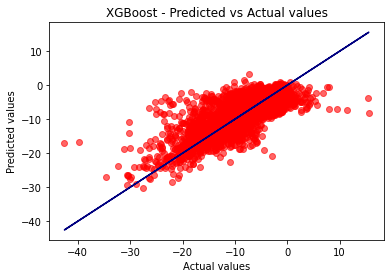

In [16]:
generatePredictionPlot(y_pred, y_test, "XGBoost")